
![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 1: Linear Regression Code Assignement

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis (2020-12-21)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_1/Session_1_Linear_Regression_exercise_NOTSOLVED.ipynb)


An Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They need our help to figure it out! 

**When working on the assignment there could be multiple models to explore data or iplement specific analysis. Choose that you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**

Feel free to add many cells as you need to write your code, comments, answers, etc.



### Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Code to avoid cell auto-scrolling

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Read the dataset provided by the company: 
They provide us with a csv file `Ecommerce_Customers.csv`

The dataset contains information about the customers:
    - Email: email of the customer.
    - Address: address of the customer.
    - Avatar: color of the avatar.
    - Avg. Session Length: Average session of in-store style advice sessions.
    - Time on App: Average time spent on App in minutes
    - Time on Website: Average time spent on Website in minutes
    - Length of Membership: How many years the customer has been a member.

In [3]:
url = 'https://raw.githubusercontent.com/vfp1/bts-cda-2020/main/Session_1/Ecommerce_Customers.csv'
customers = pd.read_csv(url)
customers.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Exploatory Data analysis

Perform some exploratory data analysis:
    - Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, remove thos variables.
    - Check for missing values
    - check the distribution of the target variable to see if there is some outlier
    - check which are the variables with highest correlation with the target variable
    - check for multi-colinearity

**Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, explain why you think they are useless and remove them.**



Write your answer here:






In [5]:
#PUT YOUR CODE HERE

## Drop email, address, and avater
customers = customers.drop(columns = ['Address','Avatar','Email'])

#### Check Missing values

In [6]:
#PUT YOUR CODE HERE

## Add further cells in case you need
customers.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

#### Check disttribution of the target variable

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


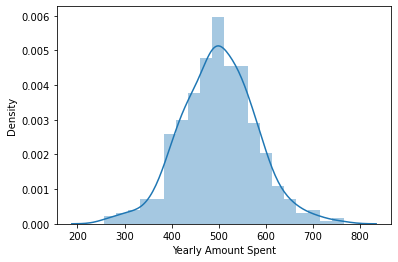

In [7]:
#PUT YOUR CODE HERE

## Add further cells in case you need
sns.distplot(customers['Yearly Amount Spent'])

#### Check correlation among variables

Explore the relation between each indipendent variable and the dipendent variable using multiple plots, among them also **jointplot** plots. 
    

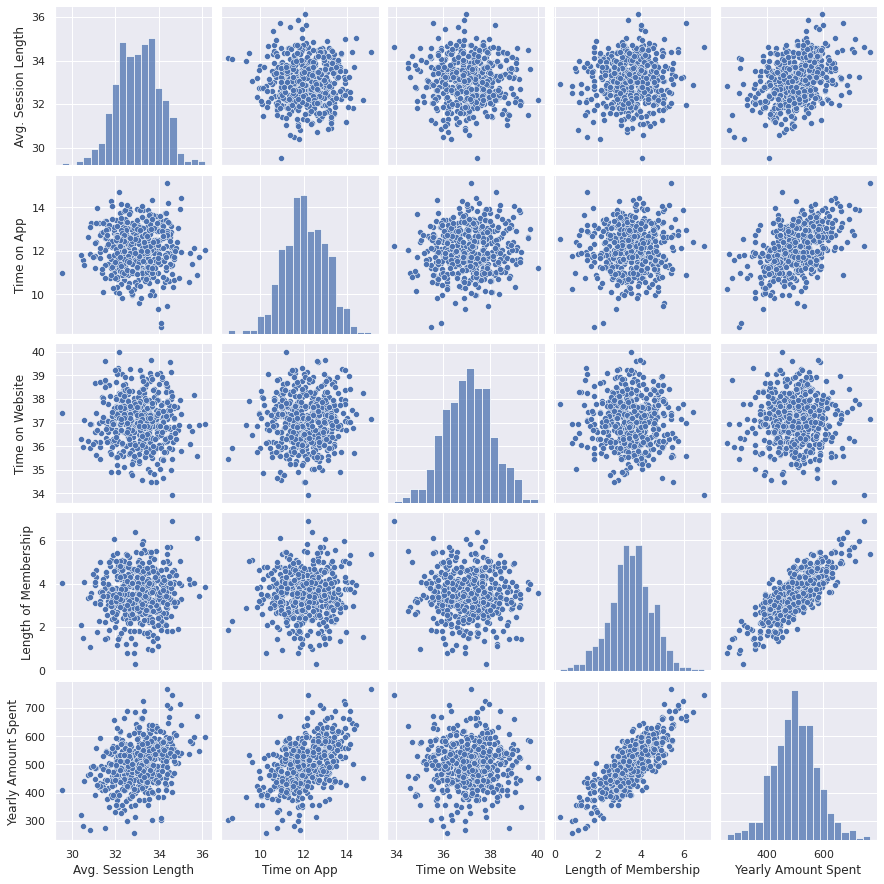

In [ ]:
#PUT YOUR CODE HERE

## Add further cells in case you need
sns.set()
sns.pairplot(customers)

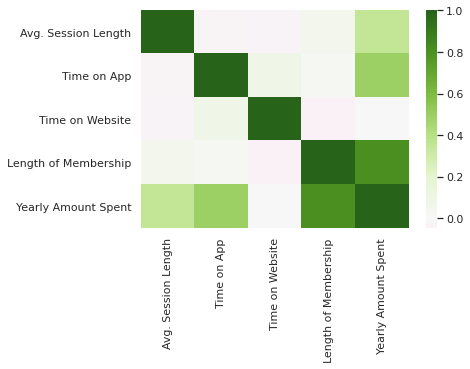

In [ ]:
sns.heatmap(pd.DataFrame(customers).corr(), cmap = 'PiYG', center = 0)

## Predictive model

Now that we have explored a bit the data we want to create a predictive model to understand if 
the company should focus more on their mobile app experience or on their website.

Or maybe there is some other apsect that is still more important and and the company should focus on it!!

Let's implement a simple linear regression model (choose the variable you reatin more appropriate and explain why you chose it) and a multivariate model that uses multiple variables. 

Then, based on your preliminary exploratoy data analysis and on the models' results draw your conclusion.

### Simple linear regression

In [8]:
# Prepare data for training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def lin_reg(feature):
  X = customers[[feature]]
  Y = customers['Yearly Amount Spent']
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
  lr = LinearRegression()
  lm = lr.fit(X_train, Y_train)
  plt.scatter(X_test, Y_test)
  plt.plot(X_test, lm.predict(X_test))
  plt.title(feature)


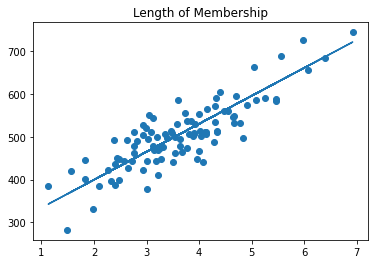

In [9]:
lin_reg('Length of Membership')

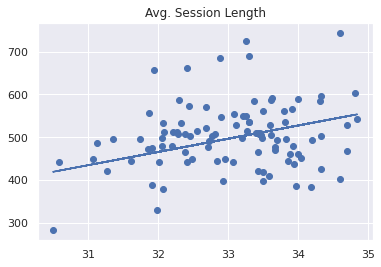

In [ ]:
lin_reg('Avg. Session Length')

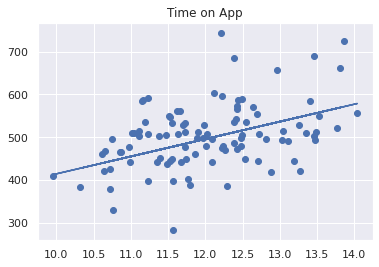

In [ ]:
lin_reg('Time on App')

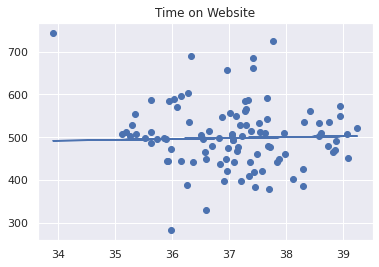

In [ ]:
lin_reg('Time on Website')

### Training and test splits
Split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [18]:
# Selecting Length of Membership due to having the strongest correlation with
# yearly amount spent.

from sklearn.model_selection import train_test_split

X = customers[['Length of Membership']]
Y = customers['Yearly Amount Spent']

X_train, X_test, Y_train, Y_test = train_test_split( X , Y, test_size = 0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(375, 1)
(125, 1)
(375,)
(125,)


### Training of the model

In [19]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Print the coeficients of the model

In [23]:
print('Intercept: ',lin_model.intercept_,'\n')
print(pd.DataFrame( lin_model.coef_, X.columns , columns=['Coefficient']))

Intercept:  269.6540359238166 

                      Coefficient
Length of Membership    65.147937


### Make a plot to show how the model fit the training data.

Looking at the plot explain if the coefficients you found make sense

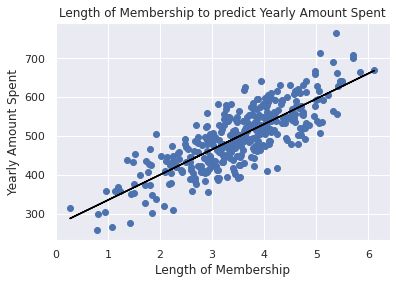

In [30]:
#PUT YOUR CODE HERE
sns.set()
plt.scatter(X_train, Y_train)
plt.plot(X_train, lin_model.predict(X_train), color = 'black')
plt.title("Length of Membership to predict Yearly Amount Spent")
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.show()


### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

Text(0.5, 0, 'Predictions')

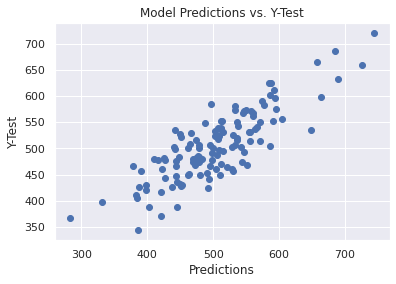

In [32]:
# Plot of predictions vs. actual
predictions = lin_model.predict(X_test)
plt.scatter(Y_test,predictions)
plt.title('Model Predictions vs. Y-Test')
plt.ylabel('Y-Test')
plt.xlabel(('Predictions'))

#### Evalution Metrics

In [33]:
from sklearn import metrics
from math import sqrt

y_train_predict = lin_model.predict(X_train)

print("The model performance for training set")
print('MAE: ', str(metrics.mean_absolute_error(Y_train, y_train_predict)))
print('MSE: ', str(metrics.mean_squared_error(Y_train, y_train_predict)))
print('RMSE: ', str(sqrt(metrics.mean_squared_error(Y_train, y_train_predict))))

print("\n")

y_test_predict = lin_model.predict(X_test)
print("The model performance for testing set")
print('MAE: ', str(metrics.mean_absolute_error(Y_test, y_test_predict)))
print('MSE: ', str(metrics.mean_squared_error(Y_test, y_test_predict)))
print('RMSE: ', str(sqrt(metrics.mean_squared_error(Y_test, y_test_predict))))

The model performance for training set
MAE:  38.61651210702132
MSE:  2311.193025103836
RMSE:  48.074868955659525


The model performance for testing set
MAE:  34.03233090526607
MSE:  1744.646561976358
RMSE:  41.768966493993574


## Multivariate Model

In [34]:
# Including [Time on App] and [Avg. Session Length]
# Disregarding [Time on Website] due to low correlation.
X = customers[['Avg. Session Length','Time on App', 'Length of Membership']]
Y = customers['Yearly Amount Spent']

### Training and test splits
Next, we split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(375, 3)
(125, 3)
(375,)
(125,)


### Training of the model

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Print the coeficients of the model

In [38]:
print('Intercept: ', lin_model.intercept_,'\n')
print(pd.DataFrame( lin_model.coef_, X.columns , columns=['Coefficient']))

Intercept:  -1038.8417386406477 

                      Coefficient
Avg. Session Length     25.883808
Time on App             38.533691
Length of Membership    61.792891


### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

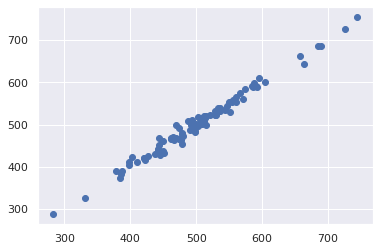

In [ ]:
predictions = lin_model.predict(X_test)
plt.scatter(Y_test,predictions)

#### Evalution Metrics

In [39]:
y_train_predict = lin_model.predict(X_train)

print("The model performance for training set")
print('MAE: ', str(metrics.mean_absolute_error(Y_train, y_train_predict)))
print('MSE: ', str(metrics.mean_squared_error(Y_train, y_train_predict)))
print('RMSE: ', str(sqrt(metrics.mean_squared_error(Y_train, y_train_predict))))

print("\n")

y_test_predict = lin_model.predict(X_test)
print("The model performance for testing set")
print('MAE: ', str(metrics.mean_absolute_error(Y_test, y_test_predict)))
print('MSE: ', str(metrics.mean_squared_error(Y_test, y_test_predict)))
print('RMSE: ', str(sqrt(metrics.mean_squared_error(Y_test, y_test_predict))))

The model performance for training set
MAE:  8.067840578778158
MSE:  100.83670879158588
RMSE:  10.041748293578458


The model performance for testing set
MAE:  7.382879447475414
MSE:  92.76139447289206
RMSE:  9.631271695518306


#### Which model has better performance?

Answer: The Multivariate model (which includes Avg. Session Length, Time on App, and Length of Membership) performs better than the Single-Variate model (which only includes Length of Membership).

**Describe how you interpret the coefficients of the model and based on that decide how the company shoud behave in order to try to improve their business increasing the `Yearly Amount Spent` per customenr.**

Based on the coefficients, Length of Membership has the greatest impact on Yearly Spend. This intuitively makes snese: a customer that has been with the company for a long time clearly likes the products/services, and will continue to make purchases. In order to capitalize on this, it's important for the company to emphasize customer retention as part of their strategy to maximize revenue.


Time on App also appears to have a strong impact on Yearly Spend. Using this knowledge, it would be good for the company to ensure the best user experience possible on their app; a clean interface, intuitive design, and a "sticky" environment (i.e. a design that keeps customers engaged and exploring new products for as long as possible).


Avg. Session Length does not have as high of an impact on Yearly Spend, but there is a noticeable impact. This would be an interesting thing to research further. It doesn't make much intuitive sense to keep customers loitering in the store as long as possible, and it also doesn't make sense to consume employee resources by attempting to draw out the length of consulation sessions. At a certain point, it could actually be cost ineffective - but perhaps there is a "sweet spot". But again - more research on this finding would be a good idea before making further recommendations.